A Model for predicting Thyroid Cancer

In [1]:
import pandas as pd

In [2]:
#open excel file as data frame
path ='20200714rawdata.xlsx'
df=pd.read_excel(path)
df.head()

,liver mean,nodule max,pathology,All TR
0,2.10,19.0,ca,TR5
1,2.40,1.9,ca,TR4
2,2.20,4.0,b,TR2
3,2.70,3.6,b,TR5
4,3.15,64.0,i,TR4


Liver mean: FDG uptake by the liver (for normalization).
Nodule max: FDG uptake by thyroid nodule.
Pathology: results of pathology cancer(ca), benign (b) , or indeterminate(i).
All TR: score of 3 radiologists on nodules (cumulative sonographic features reflected by ACR TI-RADS category). Radiologists were blinded on the previous 3 features.

In [3]:
#normalize over liver mean
df['nod_liver']=df['nodule max']/df['liver mean']
df.head()

,liver mean,nodule max,pathology,All TR,nod_liver
0,2.10,19.0,ca,TR5,9.047619
1,2.40,1.9,ca,TR4,0.791667
2,2.20,4.0,b,TR2,1.818182
3,2.70,3.6,b,TR5,1.333333
4,3.15,64.0,i,TR4,20.317460


In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

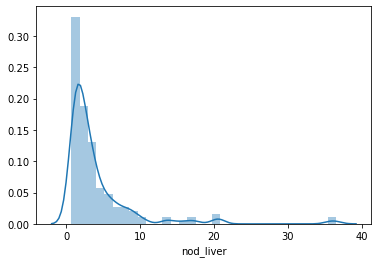

In [5]:
#histogram and boxplot showing outliers of nod_liver
import seaborn as sns
sns.distplot(df['nod_liver'])

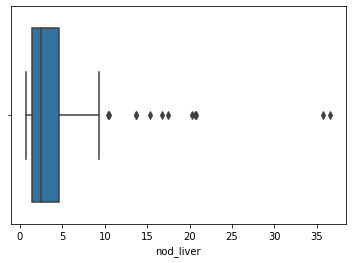

In [6]:
sns.boxplot(df['nod_liver'])

In [7]:
df.describe()

,liver mean,nodule max,nod_liver
count,170.000000,170.000000,170.000000
mean,2.677529,10.934294,4.115069
std,0.509885,14.403668,5.149025
min,1.300000,1.900000,0.714286
25%,2.342500,3.825000,1.417194
50%,2.600000,6.010000,2.500000
75%,2.920000,11.525000,4.577489
max,4.600000,116.300000,36.572581


In [8]:
#convert TR1 through TR5 to 1 - 5 in a new column
df['TRx']=df['All TR'].replace({'TR1':1,'TR2':2,'TR3':3,'TR4':4,'TR5':5})
df.head()

,liver mean,nodule max,pathology,All TR,nod_liver,TRx
0,2.10,19.0,ca,TR5,9.047619,5
1,2.40,1.9,ca,TR4,0.791667,4
2,2.20,4.0,b,TR2,1.818182,2
3,2.70,3.6,b,TR5,1.333333,5
4,3.15,64.0,i,TR4,20.317460,4


In [9]:
df.pathology.value_counts()

b     99
ca    52
i     19
Name: pathology, dtype: int64

In [10]:
# remove indeterminate pathology
df=df[df.pathology != 'i']
df.head()

,liver mean,nodule max,pathology,All TR,nod_liver,TRx
0,2.1,19.0,ca,TR5,9.047619,5
1,2.4,1.9,ca,TR4,0.791667,4
2,2.2,4.0,b,TR2,1.818182,2
3,2.7,3.6,b,TR5,1.333333,5
5,3.1,13.9,ca,TR5,4.483871,5


In [11]:
df.groupby(['TRx','pathology']).size()

TRx  pathology
1    b             1
2    b             5
     ca            1
3    b            33
     ca            5
4    b            45
     ca           14
5    b            15
     ca           32
dtype: int64

In [12]:
df.groupby(['All TR','pathology']).size()

All TR  pathology
TR1     b             1
TR2     b             5
        ca            1
TR3     b            33
        ca            5
TR4     b            45
        ca           14
TR5     b            15
        ca           32
dtype: int64

In [13]:
# replace benign with 0 and cancer with 1
df['pathology'].replace({'b':0,'ca':1},inplace= True)

In [14]:
co=df.corr()
co

,liver mean,nodule max,pathology,nod_liver,TRx
liver mean,1.000000,0.121980,-0.021615,-0.043547,-0.076141
nodule max,0.121980,1.000000,0.345891,0.968727,0.050939
pathology,-0.021615,0.345891,1.000000,0.355222,0.427164
nod_liver,-0.043547,0.968727,0.355222,1.000000,0.057453
TRx,-0.076141,0.050939,0.427164,0.057453,1.000000


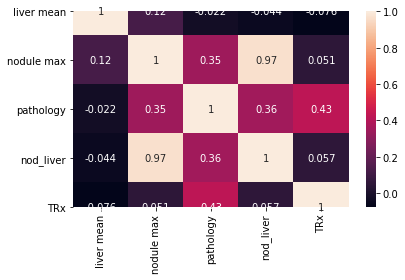

In [15]:
#correlation matrix
sns.heatmap(co, annot=True)
plt.tight_layout() 
plt.savefig('heat.png')
plt.show()


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
df.pathology.value_counts()

0    99
1    52
Name: pathology, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df['scaled_nod']=scaler.fit_transform(df[['nod_liver']])

In [19]:
df.head()

,liver mean,nodule max,pathology,All TR,nod_liver,TRx,scaled_nod
0,2.1,19.0,1,TR5,9.047619,5,0.985079
1,2.4,1.9,1,TR4,0.791667,4,-0.613974
2,2.2,4.0,0,TR2,1.818182,2,-0.415154
3,2.7,3.6,0,TR5,1.333333,5,-0.509062
5,3.1,13.9,1,TR5,4.483871,5,0.101150


In [20]:
df.describe()

,liver mean,nodule max,pathology,nod_liver,TRx,scaled_nod
count,151.000000,151.000000,151.000000,151.000000,151.000000,1.510000e+02
mean,2.680199,10.504834,0.344371,3.961632,3.960265,-2.191036e-16
std,0.504837,14.358418,0.476744,5.180207,0.886046,1.003328e+00
min,1.300000,1.900000,0.000000,0.714286,1.000000,-6.289620e-01
25%,2.400000,3.585000,0.000000,1.383308,3.000000,-4.993825e-01
50%,2.610000,5.900000,0.000000,2.275862,4.000000,-3.265082e-01
75%,2.910000,10.800000,1.000000,4.076511,5.000000,2.225018e-02
max,4.600000,116.300000,1.000000,36.572581,5.000000,6.316248e+00


In [21]:
#filter normalized nodules that are more than 1.96 standard deviation away from mean
filt = (df['scaled_nod']>1.96)|(df['scaled_nod']<-1.96)

In [22]:
filt.sum()

7

In [23]:
#create new dataframe without outliers 
df_scaled=df.loc[~filt,['nodule max','nod_liver','TRx','pathology']]

In [24]:
df_scaled.shape

(144, 4)

In [25]:
df.shape

(151, 7)

In [26]:
df_scaled.corr()

,nodule max,nod_liver,TRx,pathology
nodule max,1.000000,0.936979,-0.026113,0.423340
nod_liver,0.936979,1.000000,-0.005997,0.406961
TRx,-0.026113,-0.005997,1.000000,0.423370
pathology,0.423340,0.406961,0.423370,1.000000


In [27]:
df_scaled.describe()

,nodule max,nod_liver,TRx,pathology
count,144.000000,144.000000,144.000000,144.000000
mean,8.013403,3.021256,3.951389,0.326389
std,6.585306,2.357684,0.887598,0.470528
min,1.900000,0.714286,1.000000,0.000000
25%,3.500000,1.361373,3.000000,0.000000
50%,5.500000,2.112500,4.000000,0.000000
75%,9.312500,3.712413,5.000000,1.000000
max,40.600000,13.657588,5.000000,1.000000


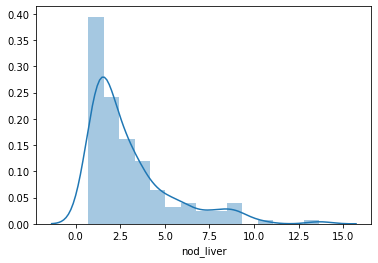

In [28]:
sns.distplot(df_scaled['nod_liver'])

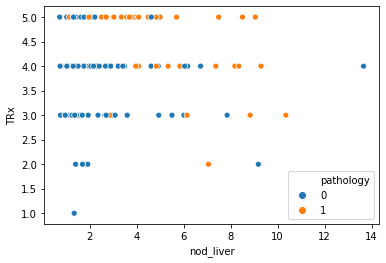

In [29]:
sns.scatterplot(x='nod_liver',y='TRx',data=df_scaled,hue='pathology')
plt.legend(loc=4)
plt.show()

In [30]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression(solver='lbfgs')
features=df_scaled[['nod_liver', 'TRx']]
labels=df_scaled['pathology']
model.fit(features,labels)
model.score(features,labels)

0.8402777777777778

In [31]:
model.coef_

array([[0.53284027, 1.59546039]])

In [32]:
model.intercept_

array([-9.04562797])

In [33]:
import numpy as np
np.exp(model.coef_)

array([[1.70376459, 4.93059857]])

In [34]:
np.exp(model.intercept_)

array([0.00011791])

Based on normalized nodule uptake and on impression of radiologists. Our model with 84% accuracy predicts benign vs cancer thyroid nodules. The relative importance of normalized nodule uptake on the odds of benign/cancer is 1.7 while the relative importance on radiologists impression is 4.9 

In [35]:
# model score is not due to overfitting
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, features, labels,cv=10) 
scores.mean()

0.8338461538461537

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(labels,model.predict(features)))

[[90  7]
 [16 31]]


In [37]:
print(classification_report(labels,model.predict(features)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        97
           1       0.82      0.66      0.73        47

    accuracy                           0.84       144
   macro avg       0.83      0.79      0.81       144
weighted avg       0.84      0.84      0.84       144

